In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from datetime import date
import calendar

In [2]:
Cab_Data           = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/Cab_Data.csv')
Cab_Data['Profit'] = Cab_Data['Price Charged'] - Cab_Data['Cost of Trip']
City               = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/City.csv')
Customer_ID        = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/Customer_ID.csv')
Transaction_ID     = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/Transaction_ID.csv')
Cust_ID_Red        = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/Cust_ID_Red.csv')
Cab2               = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/Cab2.csv')
Trav_vs_Prof       = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/Trav_vs_Prof.csv')
order              = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/order.csv')
Company            = pd.read_csv('https://raw.githubusercontent.com/ArhumAhmad/DataSets/main/Company.csv')
Flight_Data        = pd.read_excel('https://github.com/ArhumAhmad/DataSets/blob/main/Flight%20Data.xlsx?raw=true')

In [ ]:
O = order
O = O.drop(O.columns[0], axis=1)
#O = O.drop(O.columns[1], axis=1)
O = list(O['x'])
O

['SILICON VALLEY',
 'SACRAMENTO CA',
 'NEW YORK NY',
 'BOSTON MA',
 'CHICAGO IL',
 'PHOENIX AZ',
 'SAN DIEGO CA',
 'LOS ANGELES CA',
 'MIAMI FL',
 'DENVER CO',
 'ORANGE COUNTY',
 'SEATTLE WA',
 'DALLAS TX',
 'TUCSON AZ',
 'ATLANTA GA',
 'WASHINGTON DC',
 'NASHVILLE TN',
 'AUSTIN TX',
 'PITTSBURGH PA',
 'SAN FRANCISCO CA']

[Text(0, 0.5, 'Profit/Transaction ($)')]

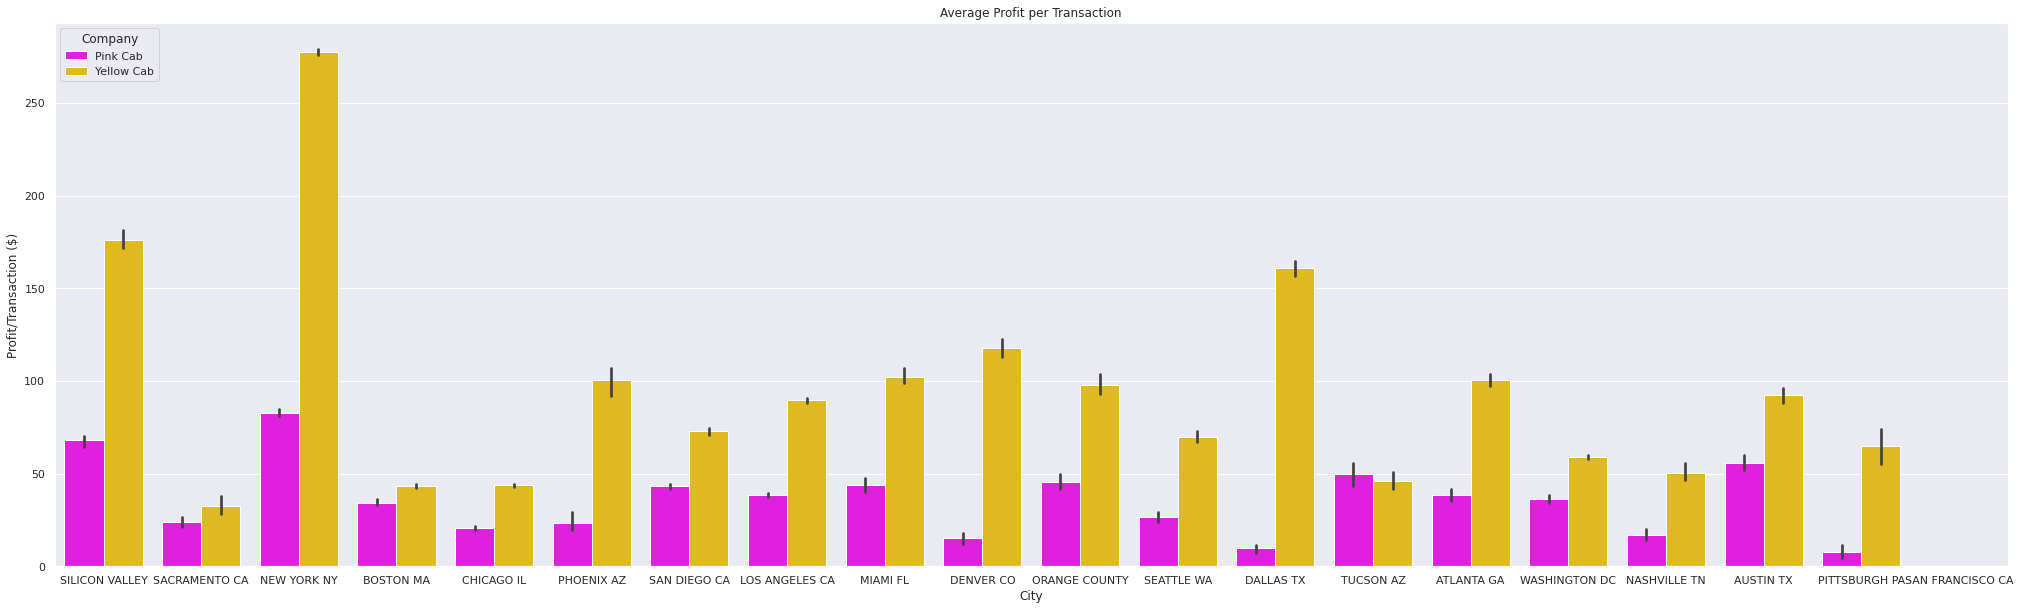

In [ ]:
plt.figure(figsize=(35,10))
colors = ['#FF00FF', '#FFCC00']
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="City", y="Profit", data=Cab_Data, hue="Company", estimator=np.median, palette=colors, order=O)
ax.set_title('Average Profit per Transaction')
ax.set(ylabel="Profit/Transaction ($)")

[Text(0, 0.5, 'Profit ($)')]

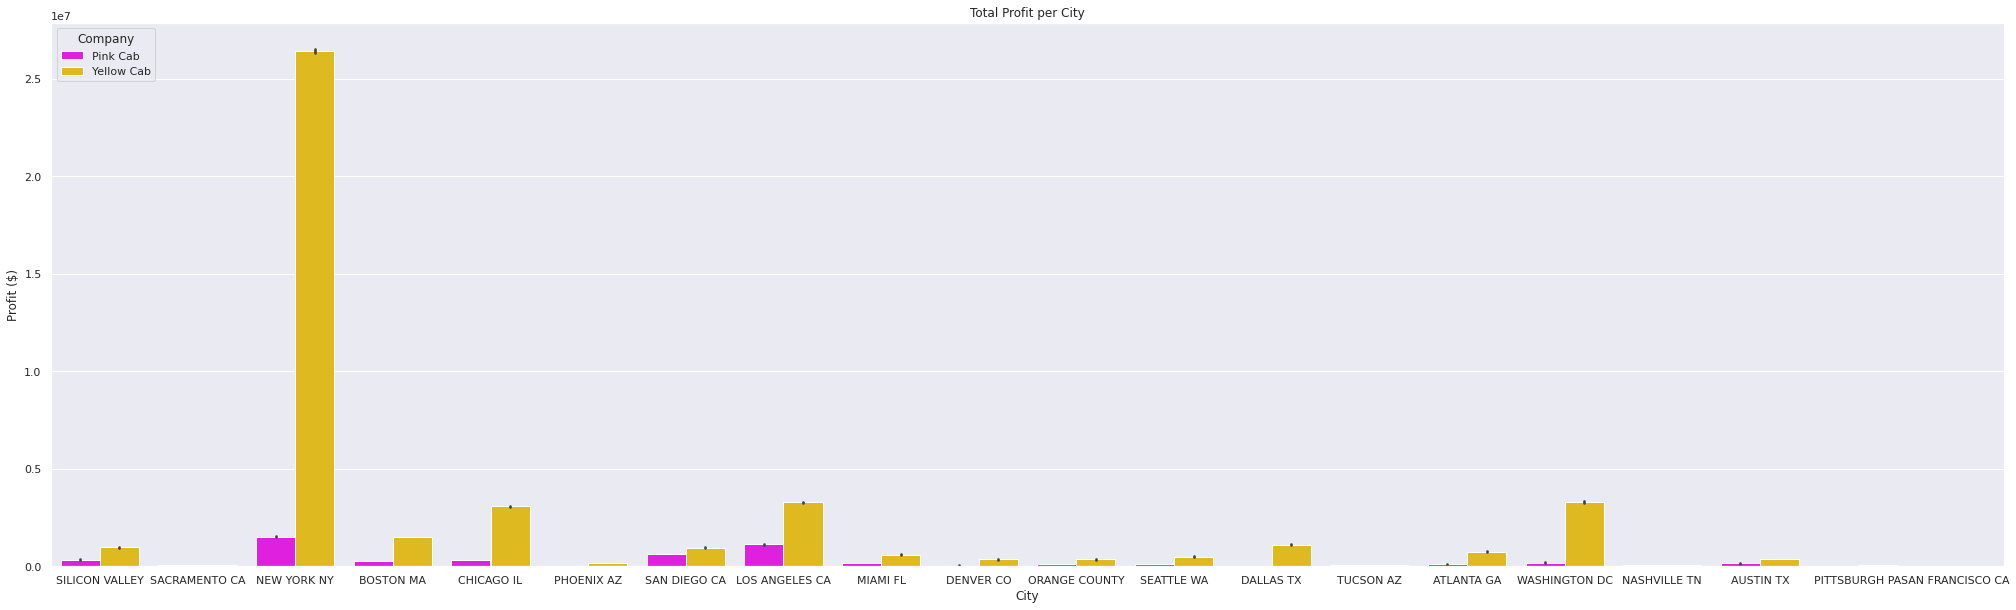

In [ ]:
plt.figure(figsize=(35,10))
colors = ['#FF00FF', '#FFCC00']
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="City", y="Profit", data=Cab_Data, hue="Company", estimator=np.sum, palette=colors, order=O)
ax.set_title('Total Profit per City')
ax.set(ylabel="Profit ($)")

Text(0, 0.5, '')

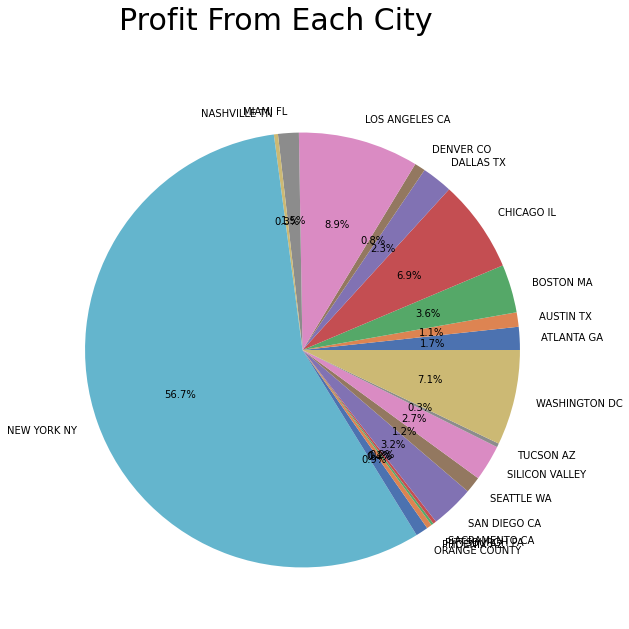

In [7]:
df=Cab_Data.copy()
df = df.groupby("City").sum()['Profit']


plt.subplots(figsize=(30,10))
sns.set_palette("deep")
df.plot.pie(autopct='%1.1f%%')
plt.suptitle("Profit From Each City", fontsize = 30)
plt.ylabel("")

In [ ]:
temp = Company[['Company', 'Male Customers', 'Female Customers']]
display(temp)

,Company,Male Customers,Female Customers
0,Pink Cab,7677,7189
1,Yellow Cab,16998,14284


Text(0.5, 1.0, 'Gender Demographics of Both Companies')

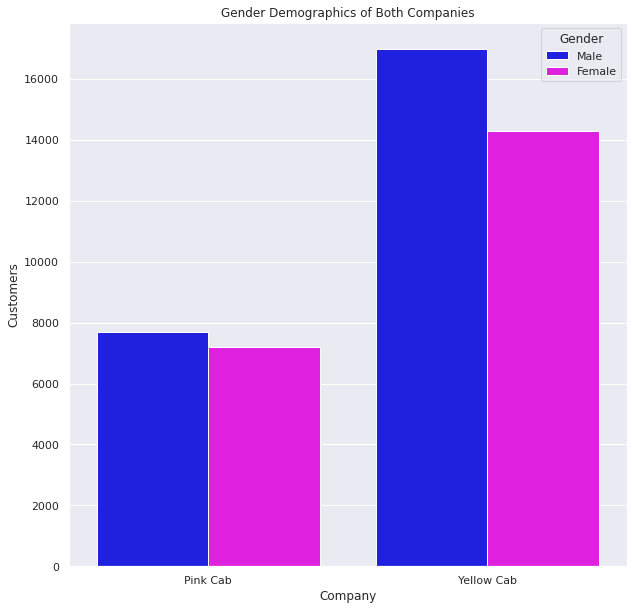

In [ ]:
plt.figure(figsize=(10,10))
colors = ['#0000FF', '#FF00FF']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Prefered Company", data=Cust_ID_Red, hue="Gender", order=["Pink Cab", "Yellow Cab"])
ax.set(xlabel="Company", ylabel="Customers")
ax.set_title("Gender Demographics of Both Companies")

[Text(0, 0.5, 'Customers')]

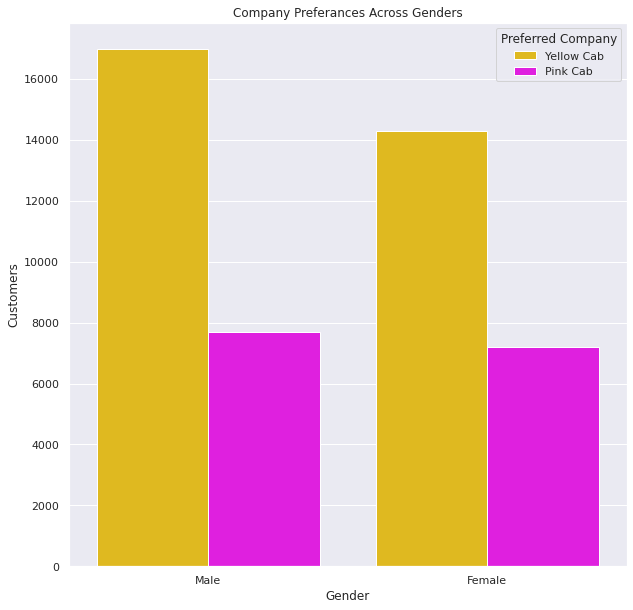

In [ ]:
plt.figure(figsize=(10,10))
colors = ['#FFCC00', '#FF00FF']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Gender", data=Cust_ID_Red, hue="Prefered Company")
ax.set_title("Company Preferances Across Genders")
ax.legend().set_title("Preferred Company")
ax.set(ylabel="Customers")

[Text(0, 0.5, 'Transactions')]

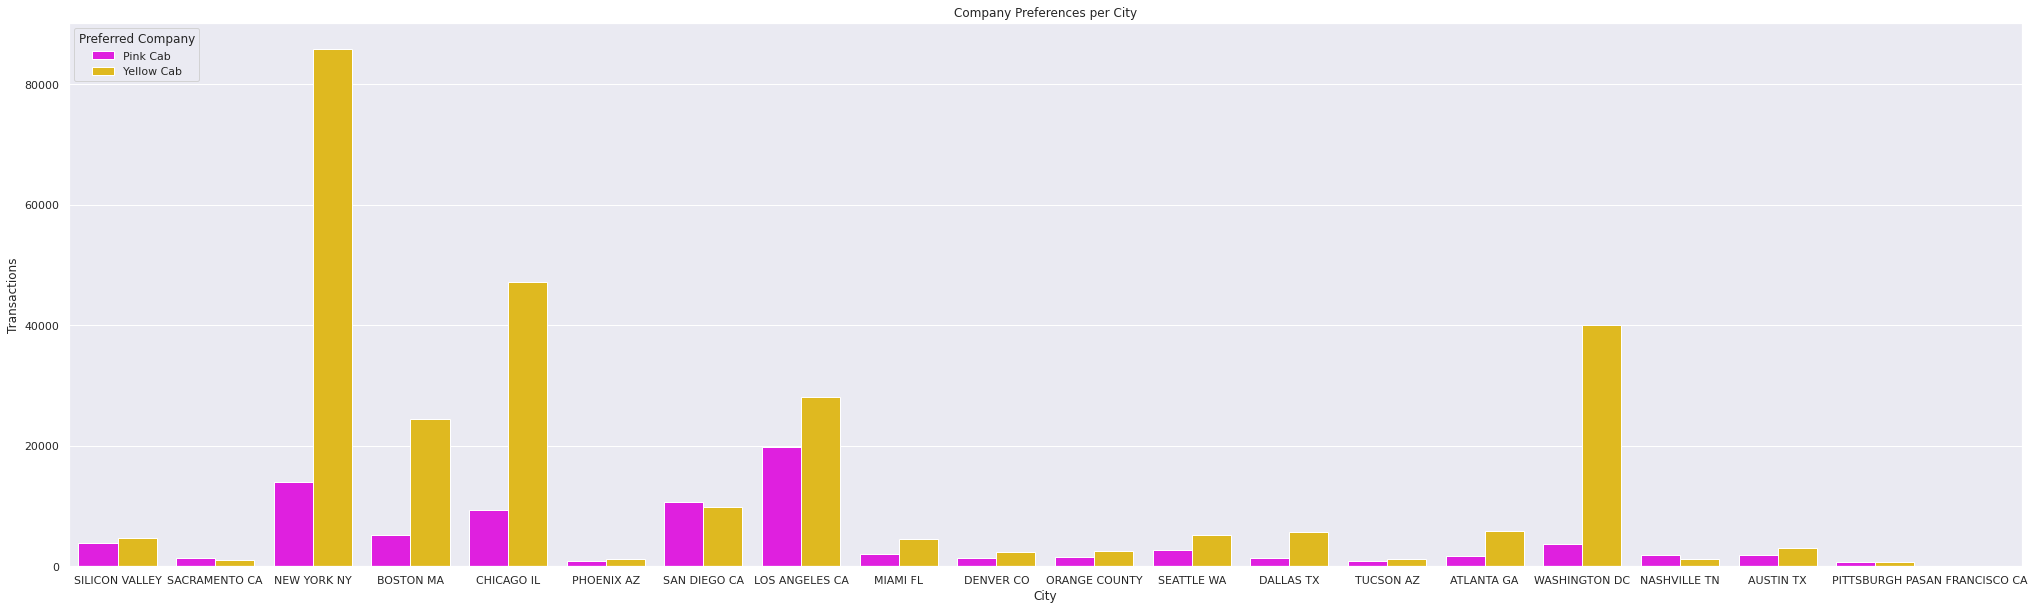

In [ ]:
plt.figure(figsize=(35,10))
colors = ['#FF00FF', '#FFCC00']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="City", data=Cab_Data, hue="Company", order=O)
ax.set_title("Company Preferences per City")
ax.legend().set_title("Preferred Company")
ax.set(ylabel="Transactions")

In [ ]:
df = Cab_Data.copy()
df['Date of Travel'] = df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df['Date of Travel'] = df['Date of Travel'].astype(str)
df['Date of Travel'] = df['Date of Travel'].str[:-3]
display(df)

[Text(0, 0.5, 'Transactions'), Text(0.5, 0, 'Month of Travel')]

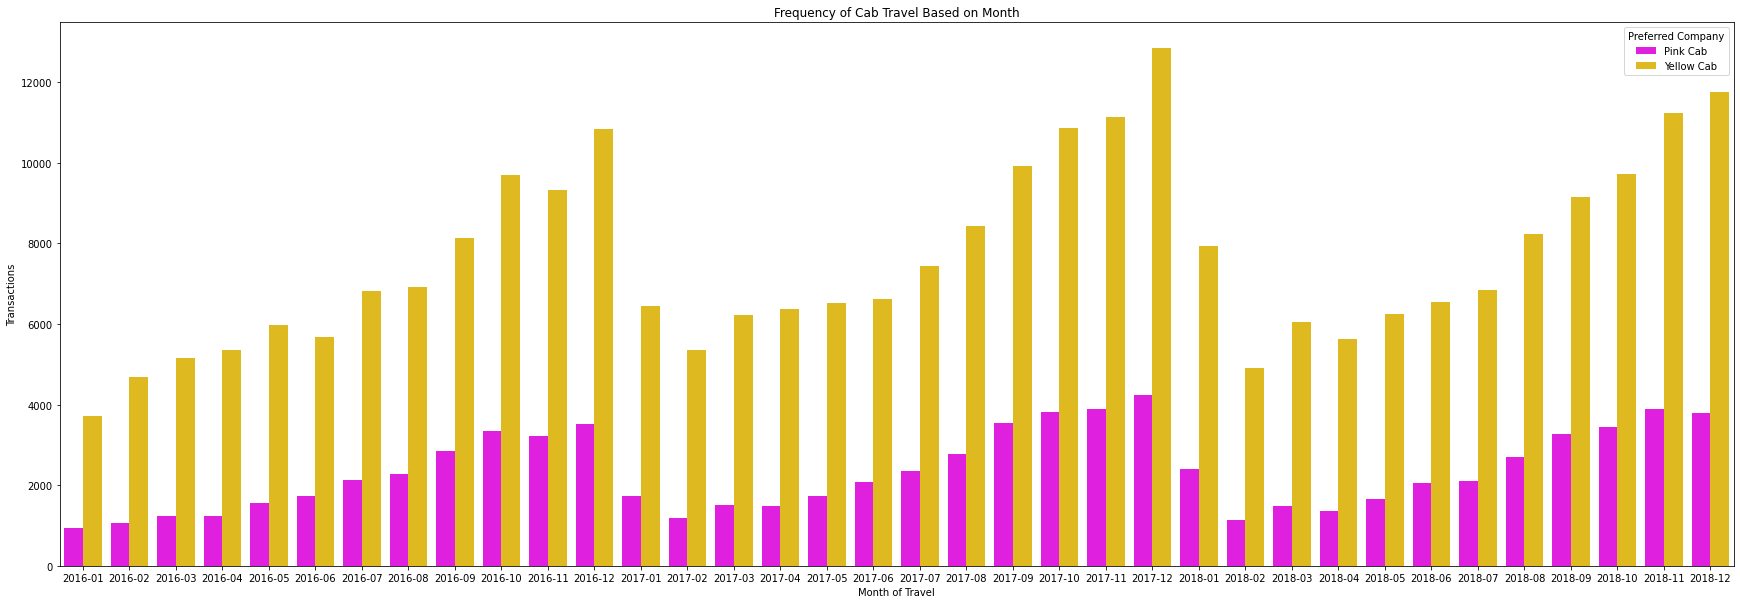

In [ ]:
plt.figure(figsize=(30,10))
colors = ['#FF00FF', '#FFCC00']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Date of Travel", data=df, hue="Company")
ax.set_title("Frequency of Cab Travel Based on Month")
ax.legend().set_title("Preferred Company")
ax.set(xlabel="Month of Travel", ylabel="Transactions")

[Text(0, 0.5, 'Transactions'), Text(0.5, 0, 'Month of Travel')]

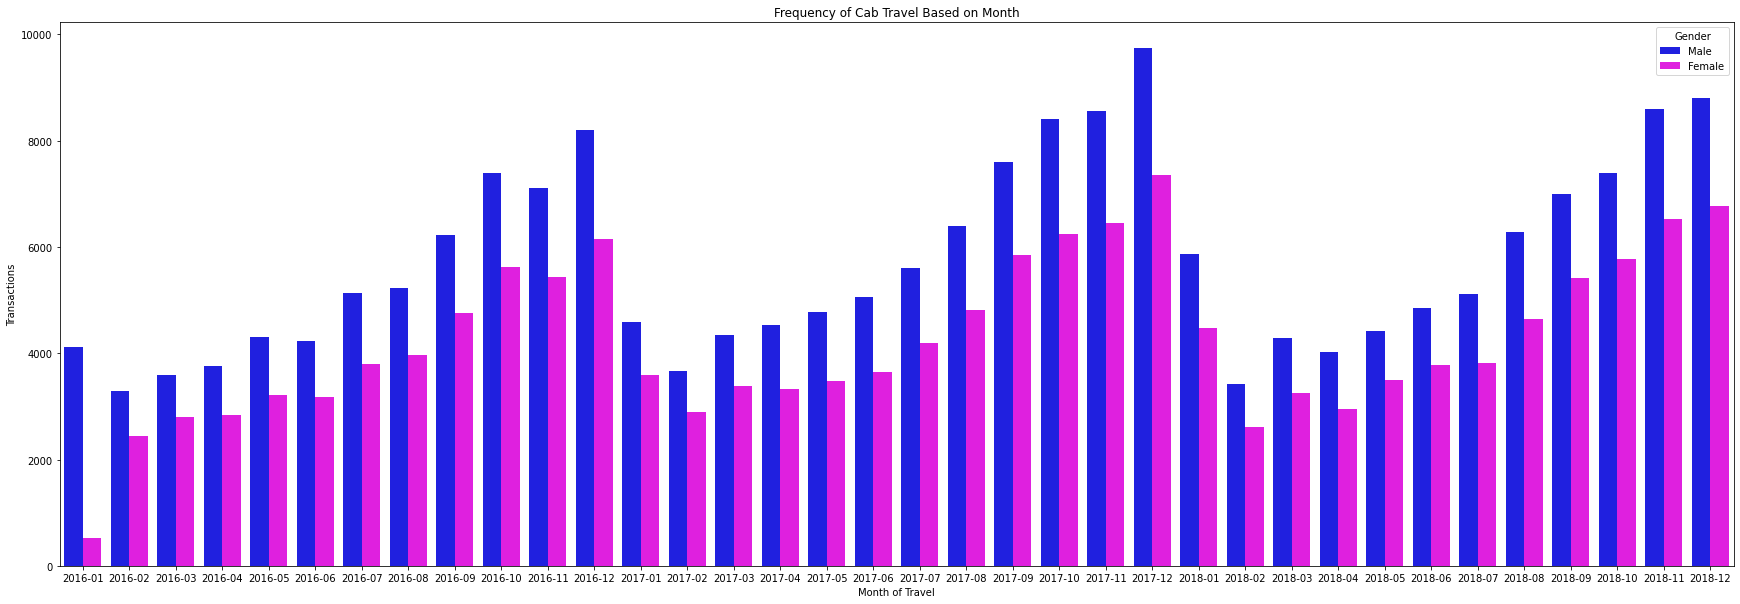

In [ ]:
plt.figure(figsize=(30,10))
colors = ['#0000FF', '#FF00FF']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Date of Travel", data=df, hue="Gender")
ax.set_title("Frequency of Cab Travel Based on Month")
ax.legend().set_title("Gender")
ax.set(xlabel="Month of Travel", ylabel="Transactions")

In [ ]:
df = Cab_Data.copy()
df['Date of Travel'] = df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df = df[df['Date of Travel'].map(lambda x: x.month) == 12]
df['Date of Travel'] = df['Date of Travel'].astype(str)
df['Date of Travel'] = df['Date of Travel'].str[5:]
df = df.sort_values(["Date of Travel"], ascending=True)
display(df)

,Unnamed: 0,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Profit
217398,217399,10266232,5142,Card,12-01,Pink Cab,CHICAGO IL,20.33,267.78,211.4320,Male,56.3480
219376,219377,10268486,2700,Card,12-01,Yellow Cab,NEW YORK NY,15.54,294.54,206.9928,Male,87.5472
219377,219378,10268487,2644,Card,12-01,Yellow Cab,NEW YORK NY,24.25,525.30,334.6500,Male,190.6500
219382,219383,10268492,2194,Card,12-01,Yellow Cab,NEW YORK NY,29.10,679.45,387.6120,Male,291.8380
219384,219385,10268494,2433,Card,12-01,Yellow Cab,NEW YORK NY,46.02,1063.20,651.6432,Female,411.5568
...,...,...,...,...,...,...,...,...,...,...,...,...
108152,108153,10132551,58042,Card,12-31,Yellow Cab,BOSTON MA,33.60,668.80,471.7440,Female,197.0560
108141,108142,10132540,59336,Card,12-31,Yellow Cab,BOSTON MA,43.20,809.59,596.1600,Female,213.4300
108126,108127,10132525,57480,Cash,12-31,Yellow Cab,BOSTON MA,33.17,653.57,398.0400,Male,255.5300
108202,108203,10132601,57037,Card,12-31,Yellow Cab,BOSTON MA,10.80,220.79,145.1520,Male,75.6380


[Text(0, 0.5, 'Transactions'), Text(0.5, 0, 'Month of Travel')]

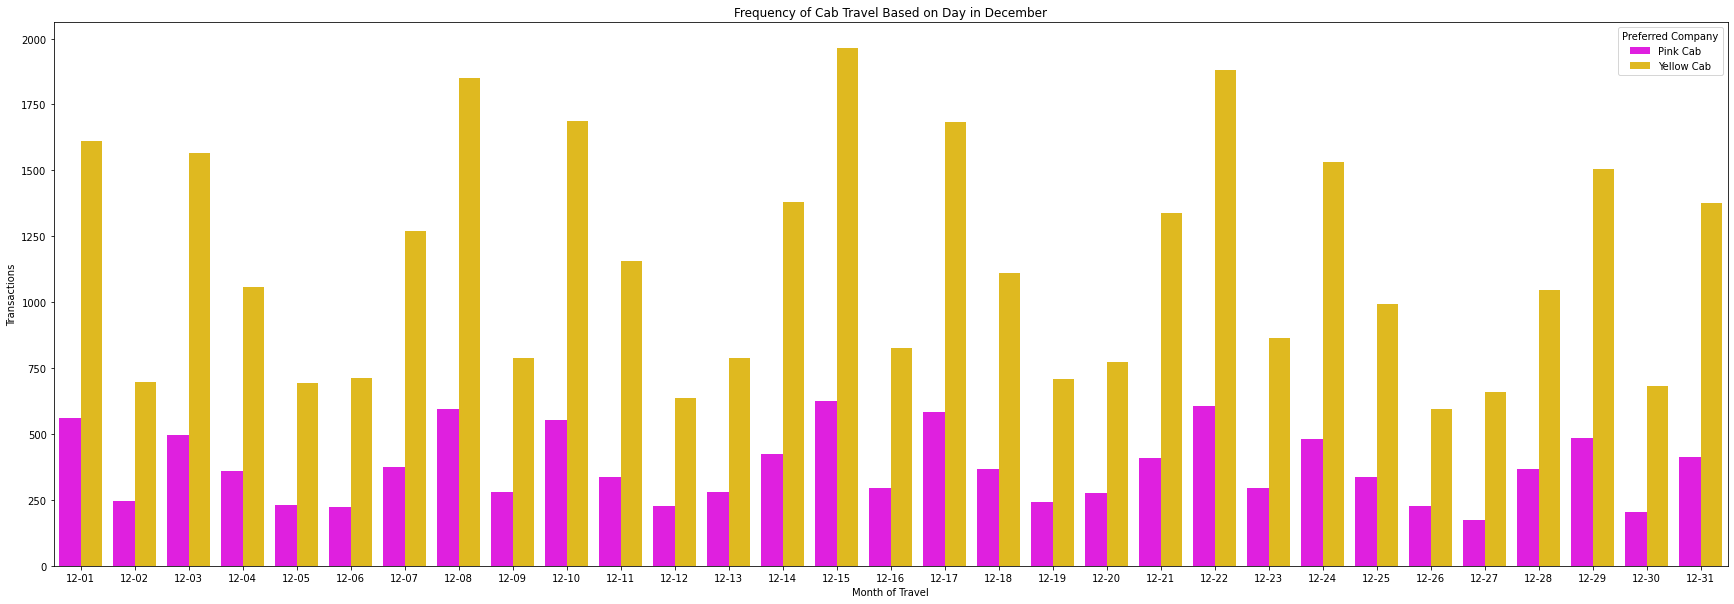

In [ ]:
plt.figure(figsize=(30,10))
colors = ['#FF00FF', '#FFCC00']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Date of Travel", data=df, hue="Company")
ax.set_title("Frequency of Cab Travel Based on Day in December")
ax.legend().set_title("Preferred Company")
ax.set(xlabel="Month of Travel", ylabel="Transactions")

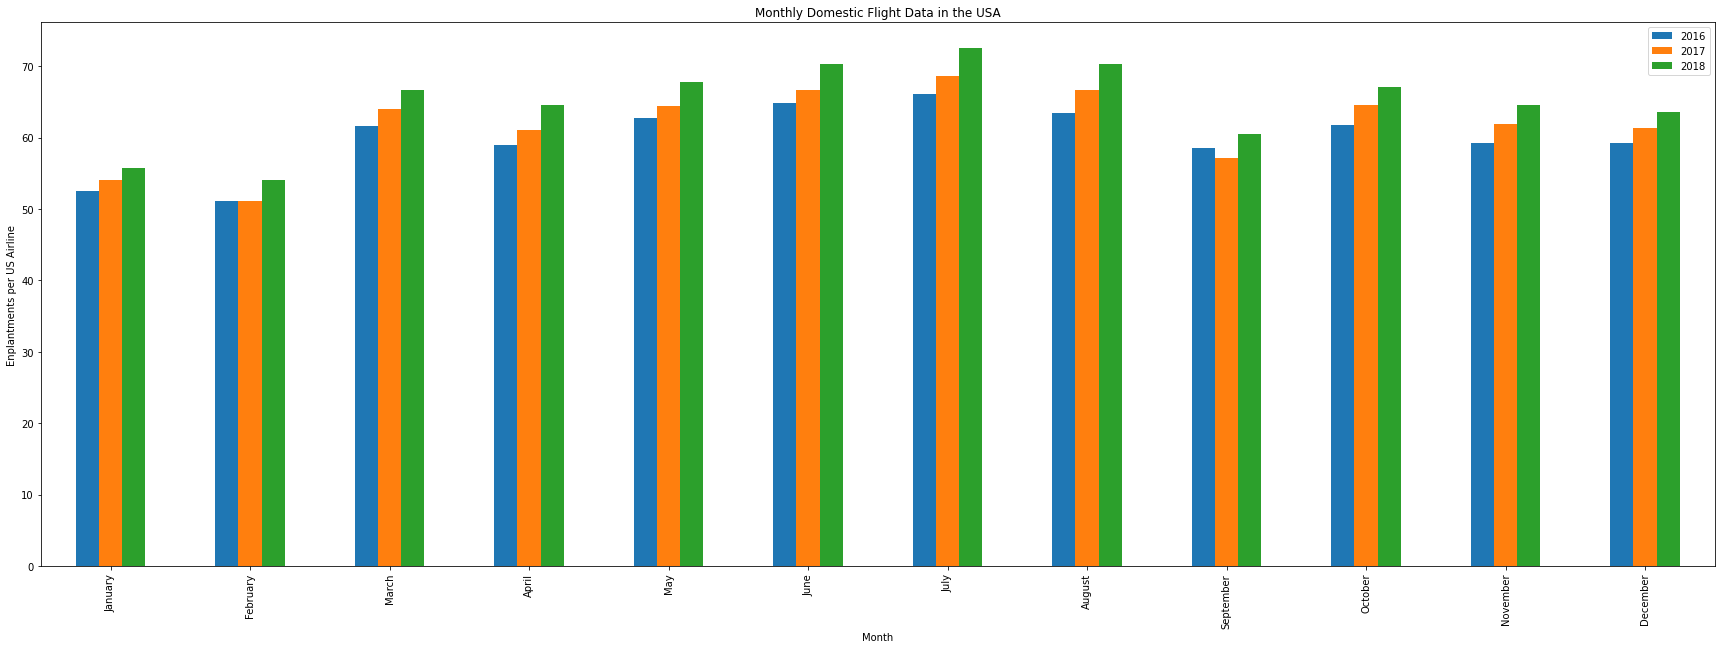

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
Flight_Data.plot.bar(x="Month", ax=ax1)
plt.title("Monthly Domestic Flight Data in the USA")
plt.ylabel("Enplantments per US Airline")
plt.show()

In [ ]:
df = Cust_ID_Red.copy()
labels = ['1967.0 - 8600.0', '8600.0 - 15200.0', '15200.0 - 21800.0','21800.0 - 28400.0', '28400.0 - 35000.0']
#pd.cut(df['Income (USD/Month)'], bins=5).value_counts(sort=False)
df['Income2'] = pd.cut(df['Income (USD/Month)'], bins=5, labels=labels)

Text(0.5, 1.0, 'Class Distribution Between Customers in Different Cities')

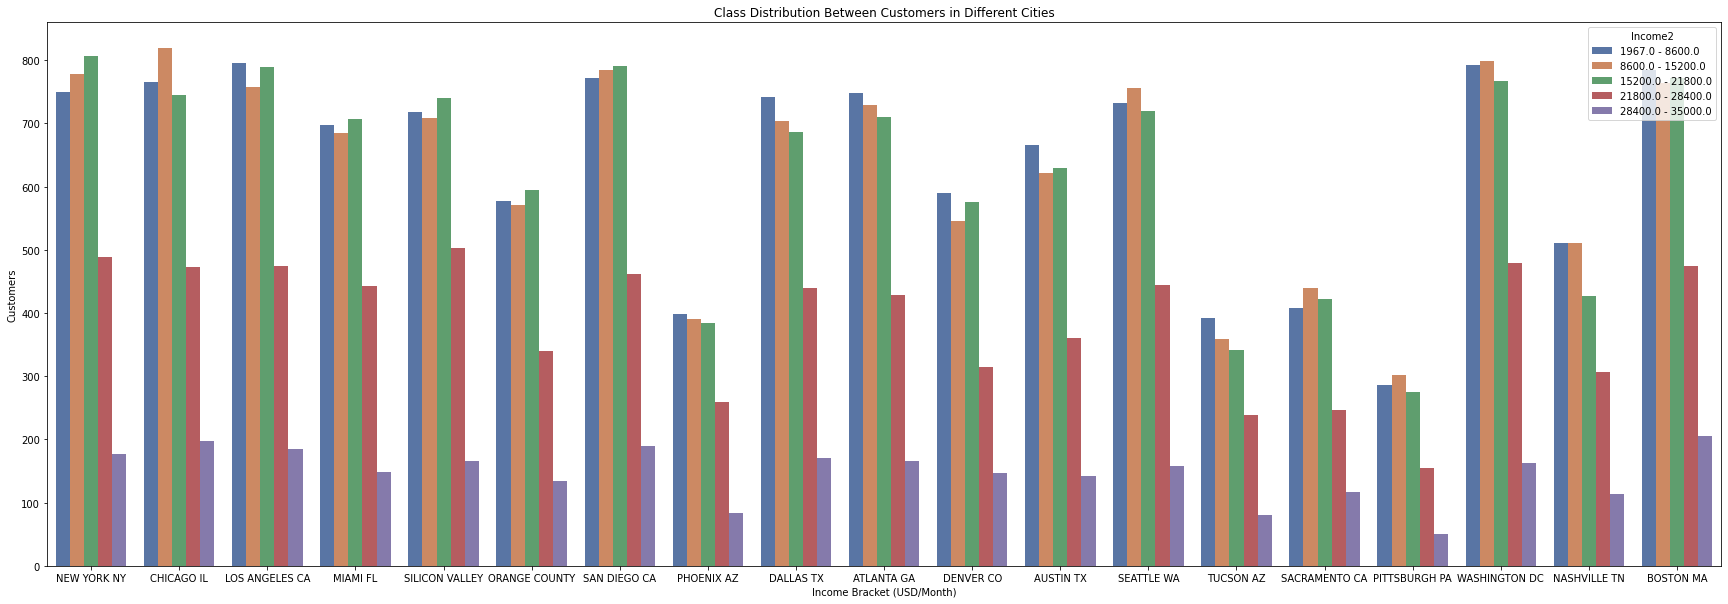

In [ ]:
plt.subplots(figsize=(30,10))
sns.set_palette("deep")
ax = sns.countplot(x="City", data=df, hue="Income2")
ax.set(xlabel="Income Bracket (USD/Month)", ylabel="Customers")
ax.set_title("Class Distribution Between Customers in Different Cities")

Text(0, 0.5, '')

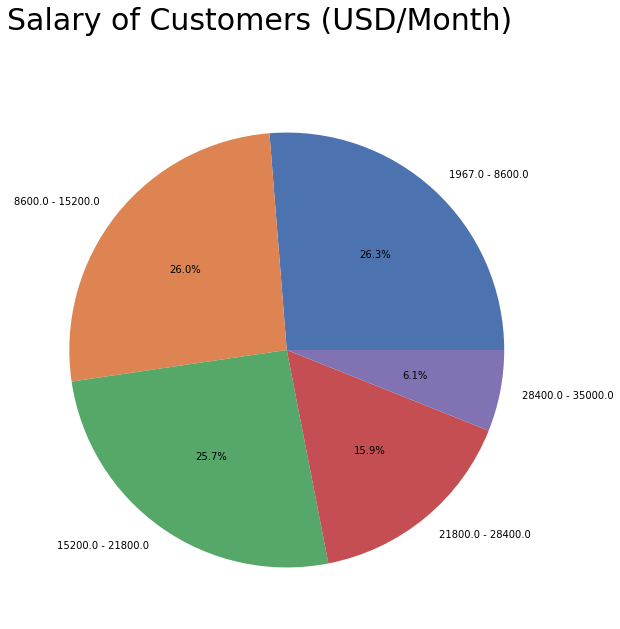

In [ ]:
plt.subplots(figsize=(30,10))
sns.set_palette("deep")
df2 = df['Income2'].value_counts()
df2.plot.pie(autopct='%1.1f%%')
plt.suptitle("Salary of Customers (USD/Month)", fontsize = 30)
plt.ylabel("")

[Text(0, 0.5, 'Average Number of Transaction per Customer (Median)'),
 Text(0.5, 0, 'Salary')]

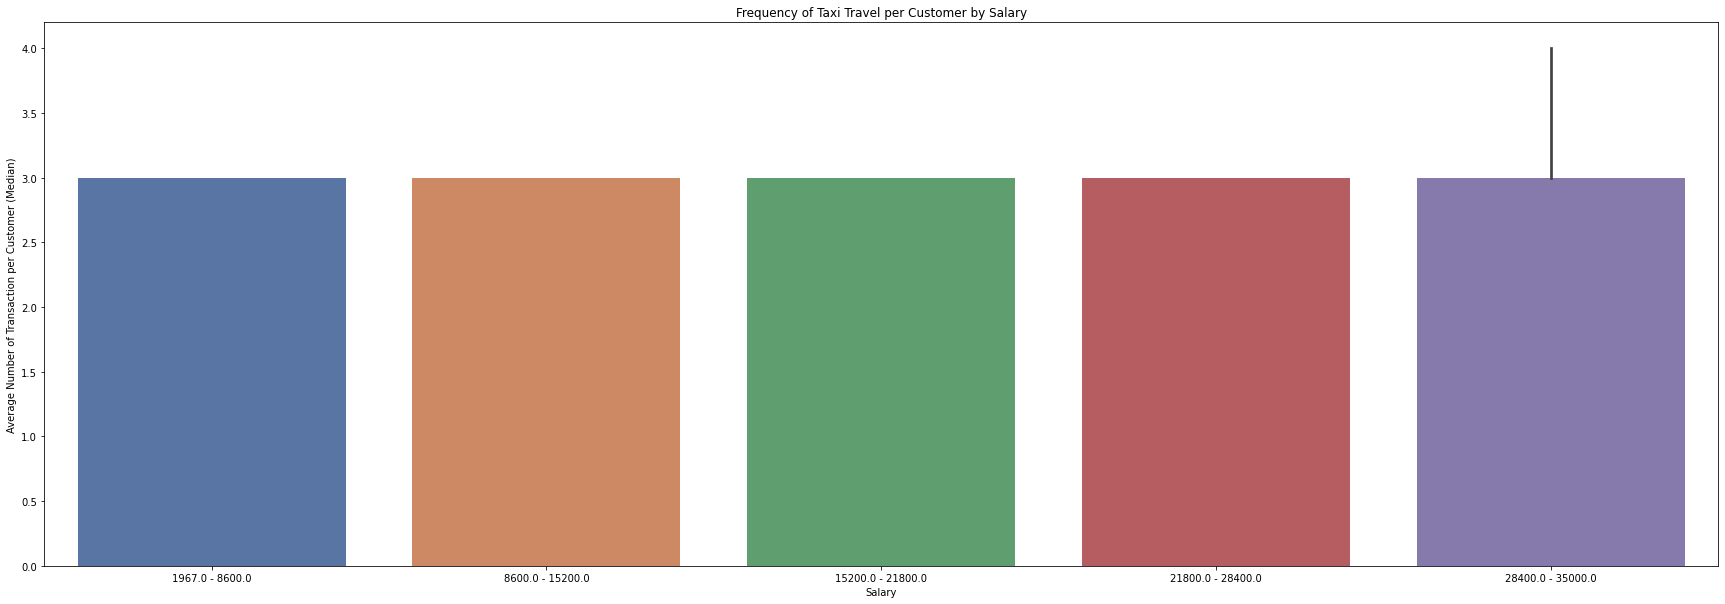

In [ ]:
plt.subplots(figsize=(30,10))
sns.set_palette("deep")
ax = sns.barplot(x="Income2", y="Transactions", data=df, estimator=np.median)
ax.set_title("Frequency of Taxi Travel per Customer by Salary")
ax.set(xlabel="Salary", ylabel="Average Number of Transaction per Customer (Median)")

In [ ]:
#df = Cust_ID_Red.copy()
#pd.cut(df['Age'], bins=5).value_counts(sort=False)
labels = ['17-27', '28-36', '37-46', '47-55', '56+']
df['Age Group'] = pd.cut(df['Age'], bins=5, labels=labels)

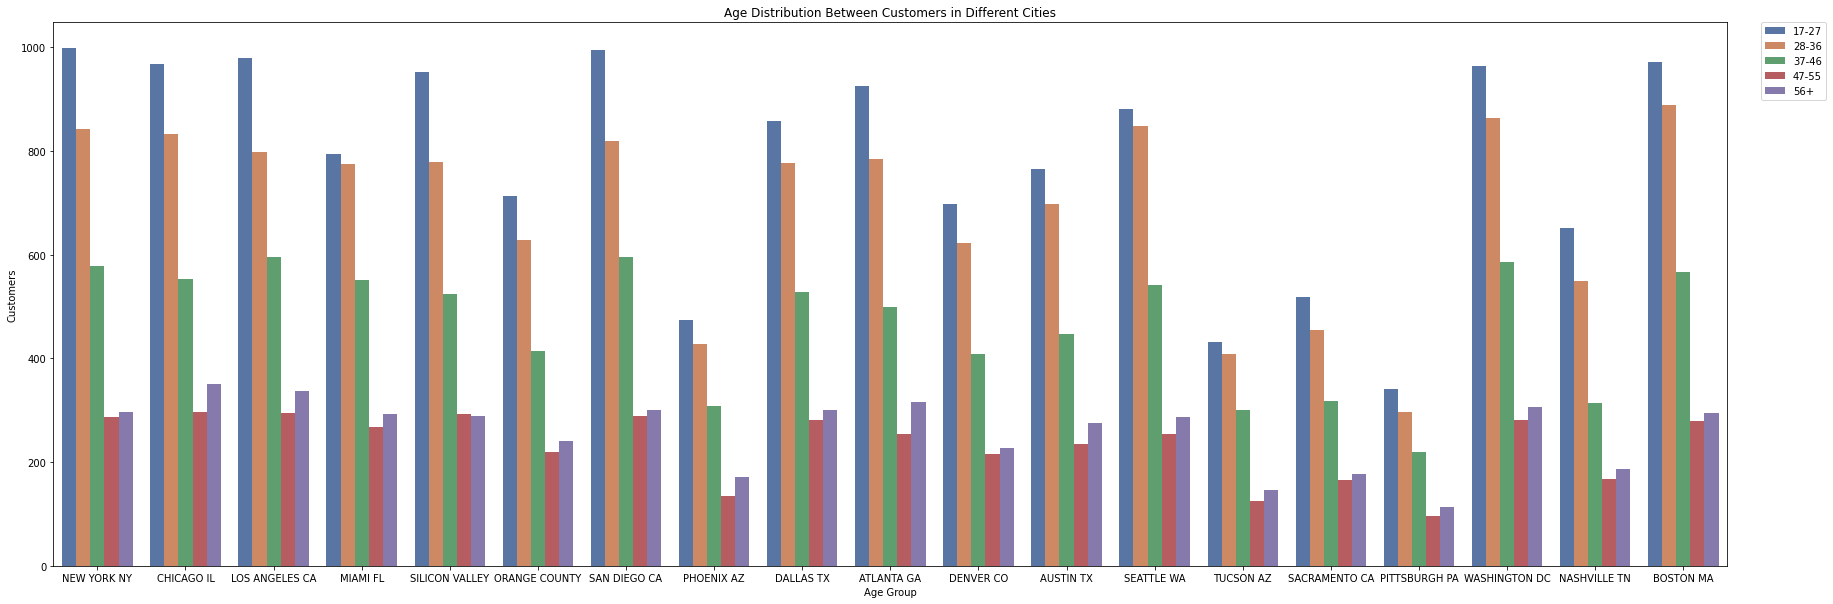

In [ ]:
plt.subplots(figsize=(30,10))
sns.set_palette("deep")
ax = sns.countplot(x="City", data=df, hue="Age Group")
ax.set(xlabel="Age Group", ylabel="Customers")
ax.set_title("Age Distribution Between Customers in Different Cities")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Text(0, 0.5, '')

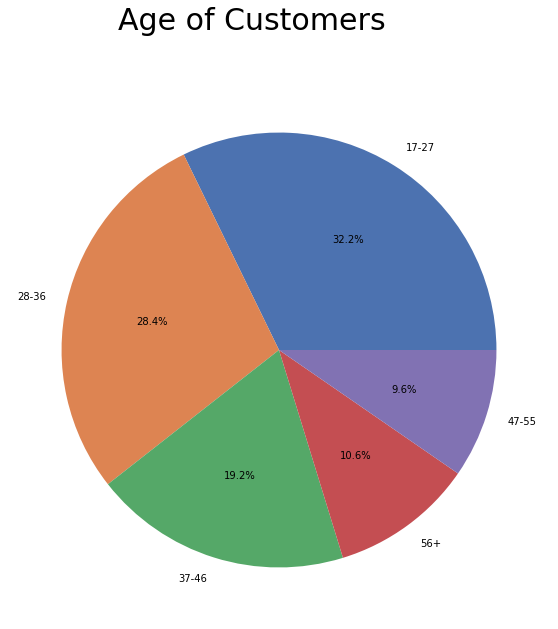

In [ ]:
plt.subplots(figsize=(30,10))
sns.set_palette("deep")
df2 = df['Age Group'].value_counts()
df2.plot.pie(autopct='%1.1f%%')
plt.suptitle("Age of Customers", fontsize = 30)
plt.ylabel("")

[Text(0, 0.5, 'Average Number of Transaction per Customer (Median)'),
 Text(0.5, 0, 'Age')]

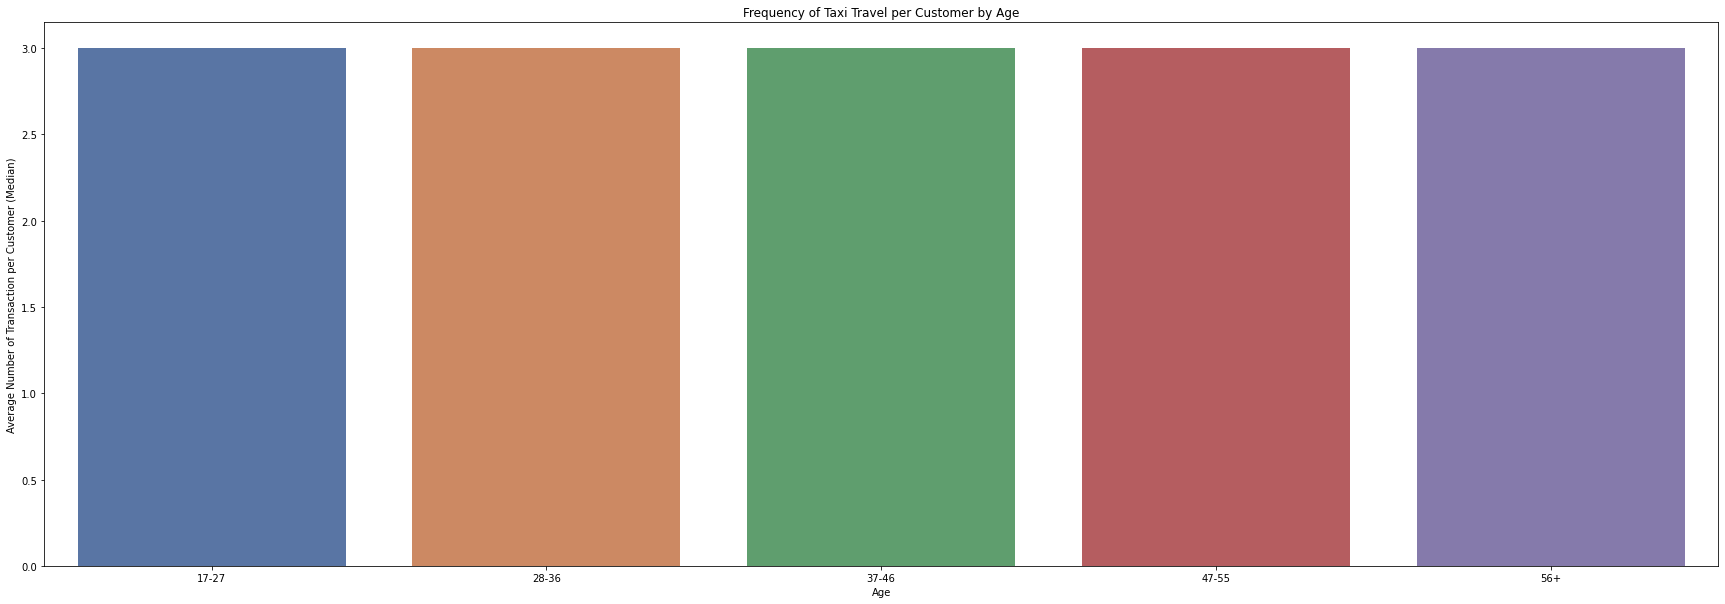

In [ ]:
plt.subplots(figsize=(30,10))
sns.set_palette("deep")
ax = sns.barplot(x="Age Group", y="Transactions", data=df, estimator=np.median)
ax.set_title("Frequency of Taxi Travel per Customer by Age")
ax.set(xlabel="Age", ylabel="Average Number of Transaction per Customer (Median)")

Text(0.5, 1.0, 'Age vs Gender')

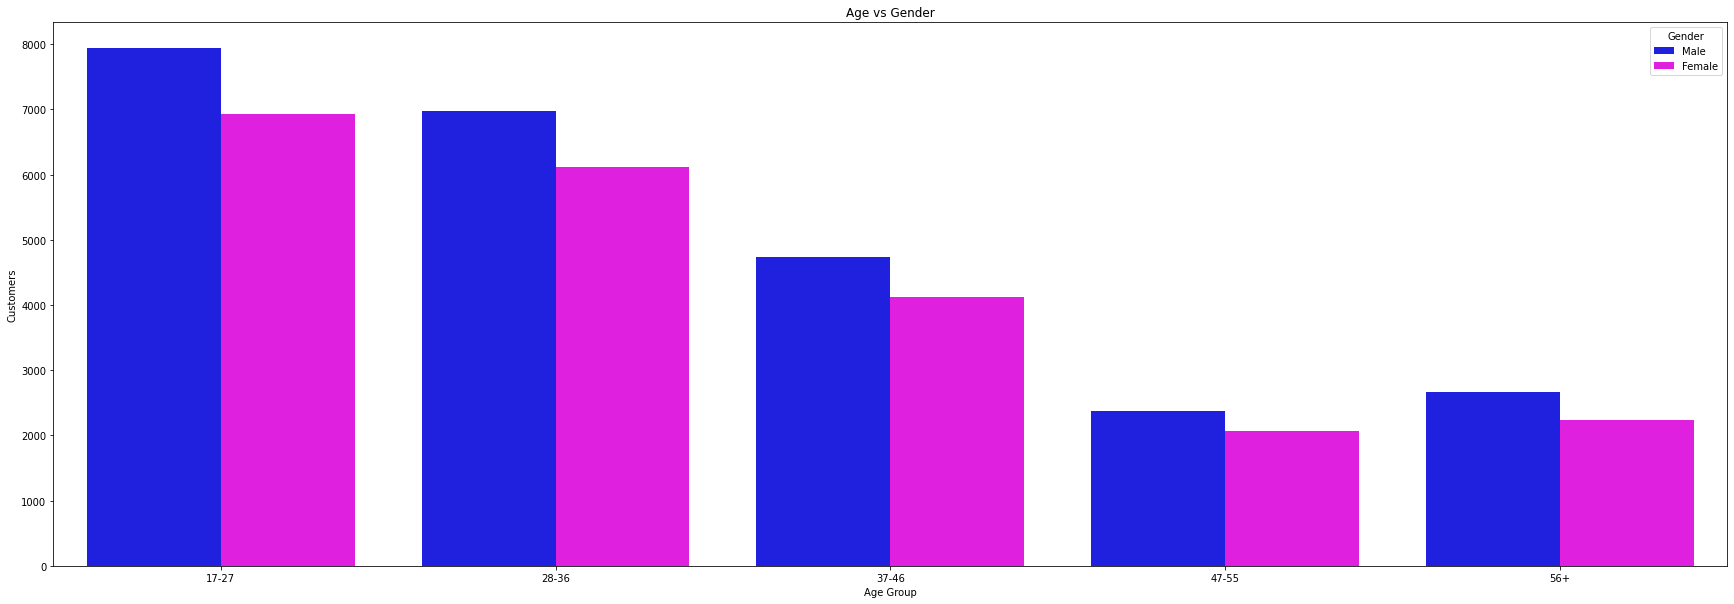

In [ ]:
plt.subplots(figsize=(30,10))
ax = sns.countplot(x="Age Group", data=df, hue="Gender")
ax.set(ylabel="Customers")
ax.set_title("Age vs Gender")

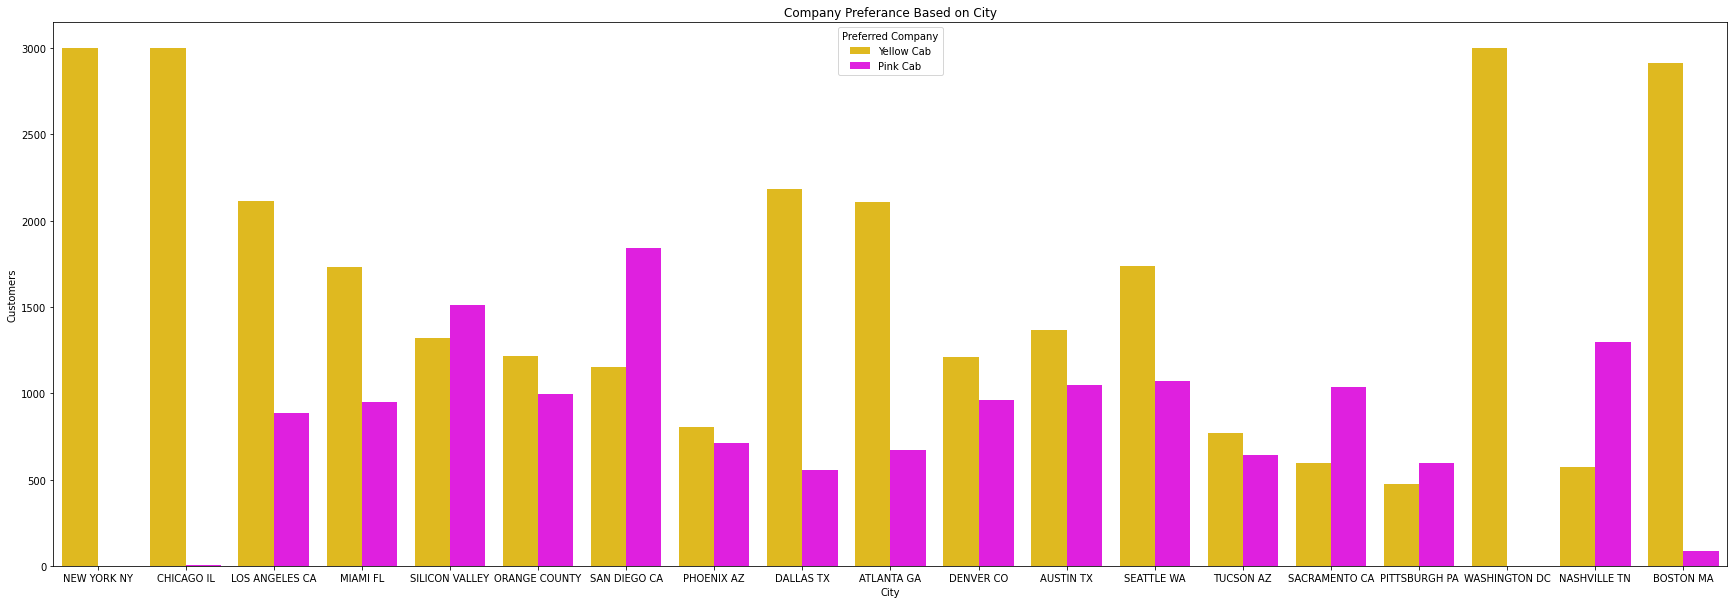

In [ ]:
plt.subplots(figsize=(30,10))
colors = ['#FFCC00', '#FF00FF']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="City", data=df, hue="Prefered Company")
ax.set(xlabel="City", ylabel="Customers")
ax.set_title("Company Preferance Based on City")
ax.legend().set_title("Preferred Company")

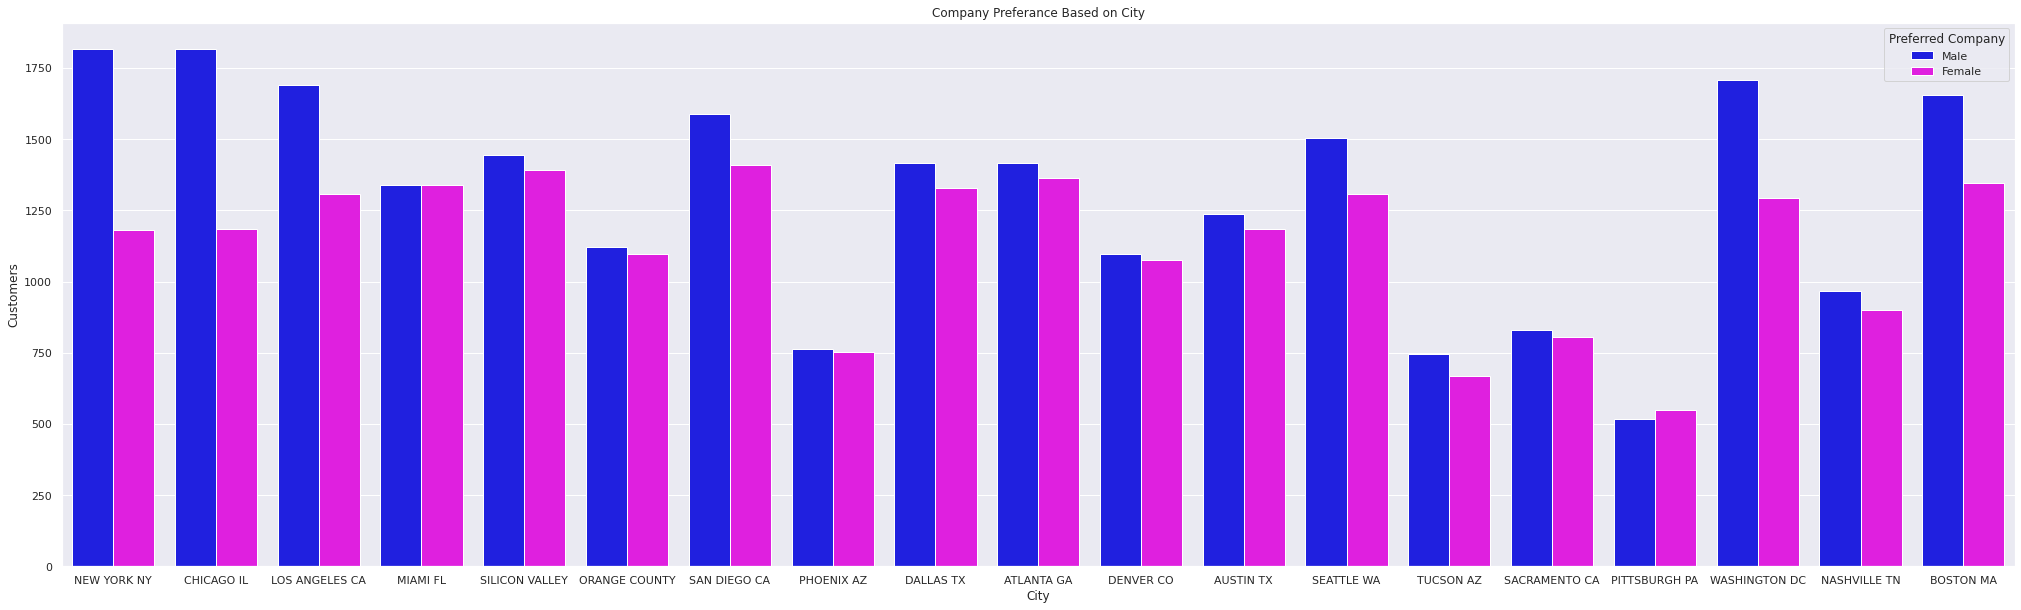

In [ ]:
plt.subplots(figsize=(35,10))
colors = ['#0000FF', '#FF00FF']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="City", data=df, hue="Gender")
ax.set(xlabel="City", ylabel="Customers")
ax.set_title("Number of Customers per City")
ax.legend().set_title("Preferred Company")

In [ ]:
df = Cab_Data.copy()
df['Date of Travel'] = df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
#day = df['Date of Travel'][2]
#print(day)
#calendar.day_name[day.weekday()]
df['Weekday'] = df['Date of Travel'].apply(lambda s: calendar.day_name[s.weekday()])
#df = df.loc[df['City'] == "NEW YORK NY"]
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

Text(0.5, 1.0, 'Weekly Taxi Usage (NYC, NY)')

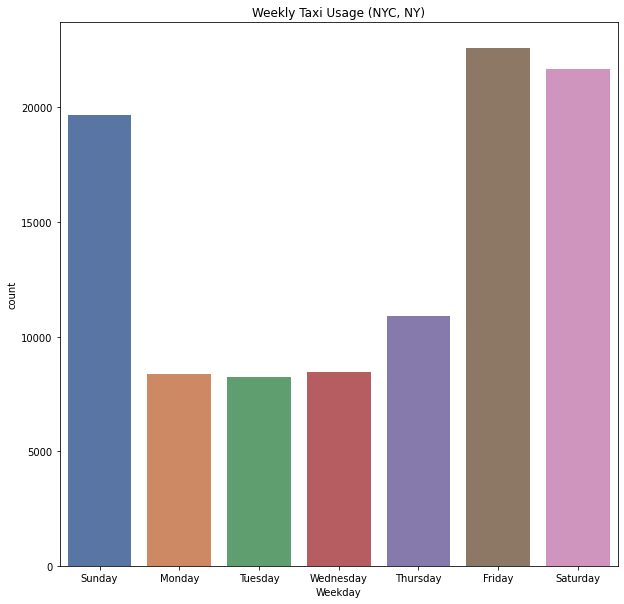

In [ ]:
plt.subplots(figsize=(10,10))
ax = sns.countplot(x="Weekday", data=df.loc[df['City'] == "NEW YORK NY"], order=order)
ax.set_title("Weekly Taxi Usage (NYC, NY)")

[Text(0, 0.5, 'Transactions')]

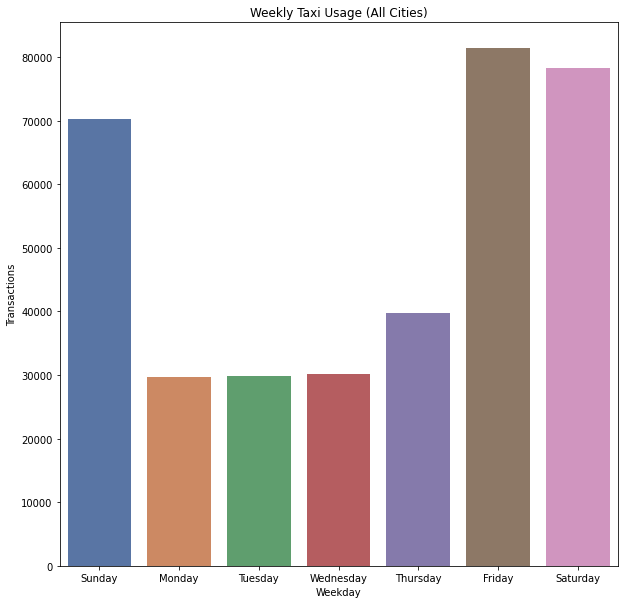

In [ ]:
plt.subplots(figsize=(10,10))
sns.set_palette("deep")
ax = sns.countplot(x="Weekday", data=df, order=order)
ax.set_title("Weekly Taxi Usage (All Cities)")
ax.set(ylabel="Transactions")

In [ ]:
df = Cab_Data.copy()
df['Date of Travel'] = df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df['Date of Travel'] = df['Date of Travel'].astype(str)
df['Date of Travel'] = df['Date of Travel'].str[:-3]

[Text(0, 0.5, 'Transactions'), Text(0.5, 0, 'Month of Travel')]

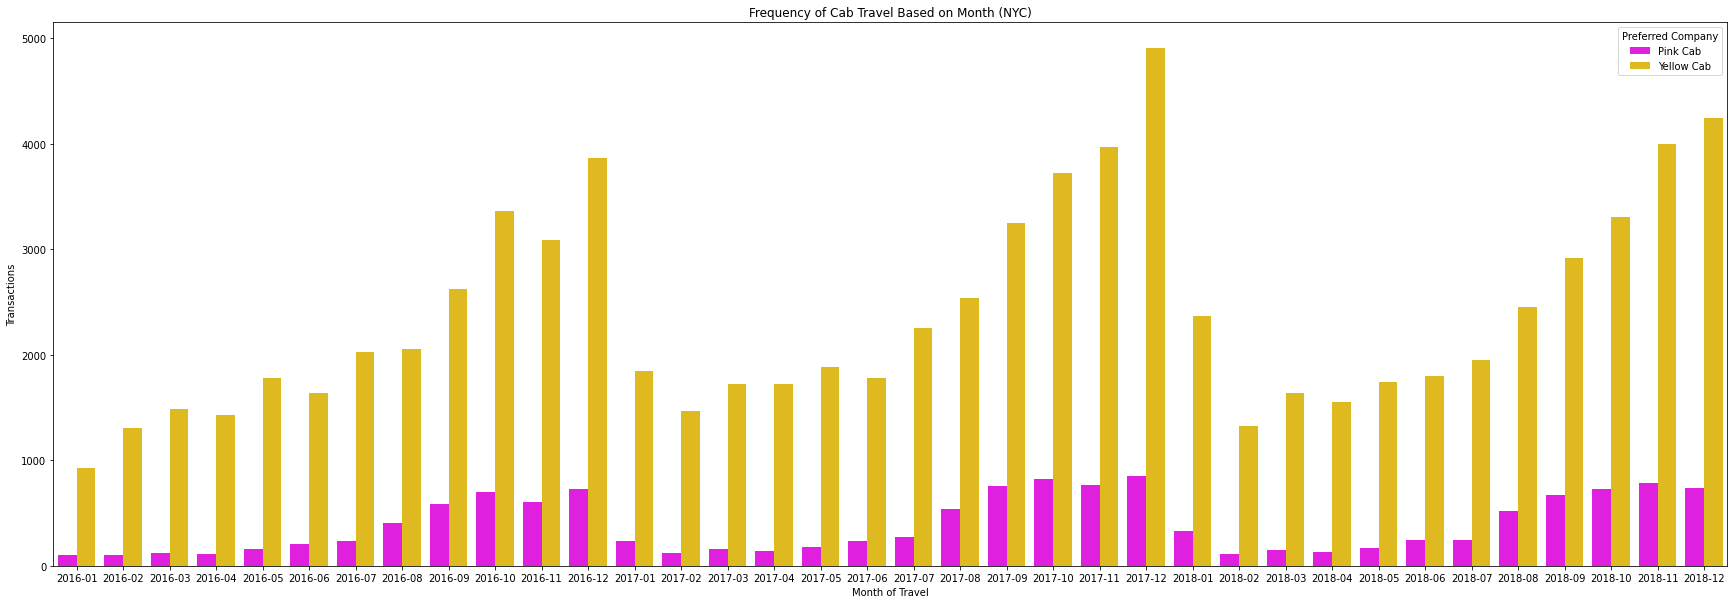

In [ ]:
plt.figure(figsize=(30,10))
colors = ['#FF00FF', '#FFCC00']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Date of Travel", data=df.loc[df['City'] == "NEW YORK NY"], hue="Company")
ax.set_title("Frequency of Cab Travel Based on Month (NYC)")
ax.legend().set_title("Preferred Company")
ax.set(xlabel="Month of Travel", ylabel="Transactions")

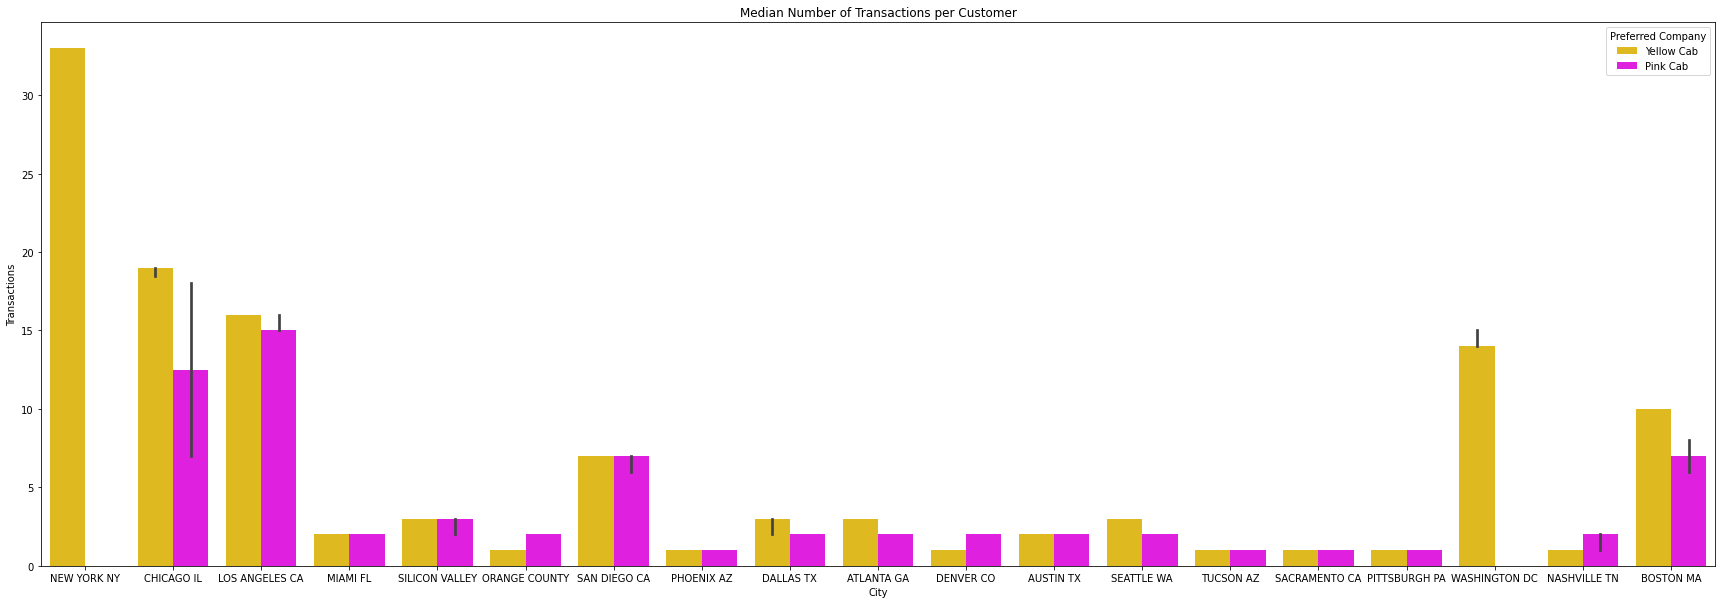

In [ ]:
df = Cust_ID_Red.copy()


plt.figure(figsize=(30,10))
colors = ['#FFCC00' ,'#FF00FF']
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="City", y="Transactions", data=df, hue="Prefered Company", estimator=np.median)
ax.set_title("Median Number of Transactions per Customer")
ax.legend().set_title("Preferred Company")

Text(0, 0.5, '')

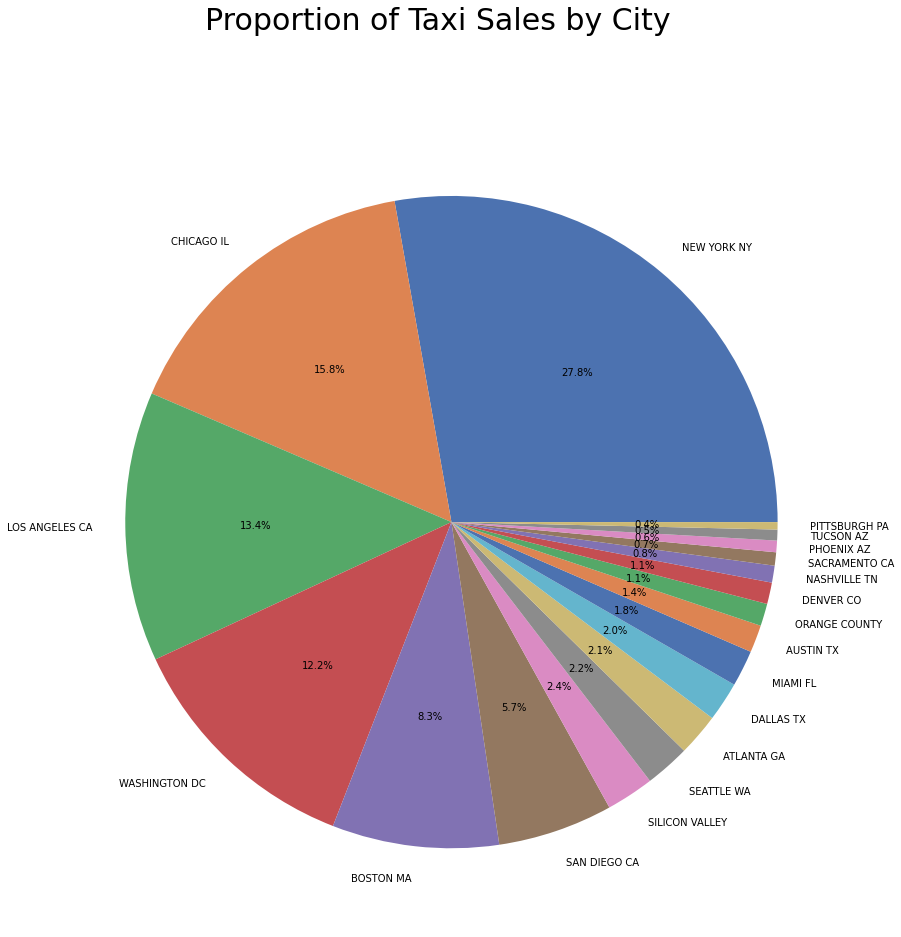

In [ ]:
plt.subplots(figsize=(15,15))
df = Cab_Data['City'].value_counts()
sns.set_palette("deep")
df.plot.pie(autopct='%1.1f%%')
plt.suptitle("Proportion of Taxi Sales by City", fontsize = 30)
plt.ylabel("")

Text(0.5, 1.0, 'Frequency of Taxi Travel per Customer')

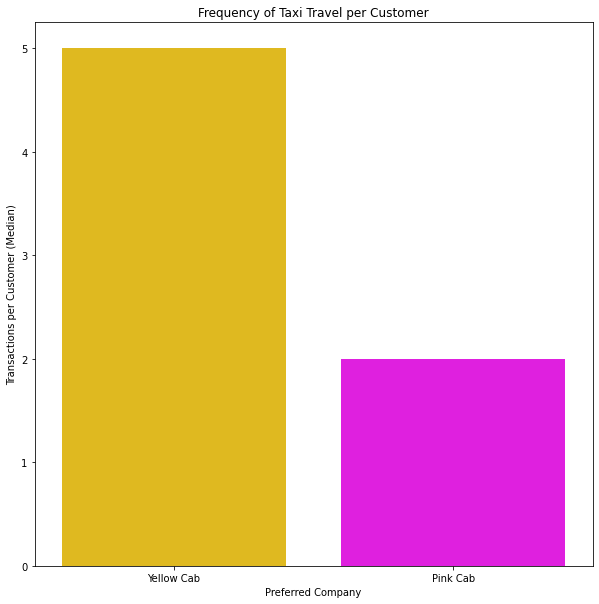

In [ ]:
plt.subplots(figsize=(10,10))
df=Cust_ID_Red.copy()
colors = ['#FFCC00' ,'#FF00FF']
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="Prefered Company", y="Transactions", data=df, estimator=np.median)
ax.set(xlabel="Preferred Company", ylabel="Transactions per Customer (Median)")
ax.set_title("Frequency of Taxi Travel per Customer")